### ЛР №1. Вариант 15

### Задание 1
----

1. Сфоримировать выборку случайных величин
$$ Y_i=tg(x_i) $$, где $$ x_i $$ &mdash; равномерно распределенное число из интервала
$$ [0, \pi/4], I=1, ..., n. $$ Величина n задается

$$ y_0=0.5 $$

* Определить параметры равномерного расспределения (елси они не даны в условии задачи в явном виде).
* Сформировать программными средствами равномерно распределенное число $$ \xi_i $$ из интрвала
 $$ [0, 1] $$.
* Преобразовать число $$ \xi_i $$ в число $$ x_i $$, имеющее равномерное распределение из
 интервала $$ [0, \pi/4] $$ по формуле:

$$ X_i = \xi_i (b-a)+a $$

* Получить случайное число


2. Для полученной случайной величины построить вариационный ряд, эмпирическую функцию распределения СВ
$$ Y $$.
 Результаты предоставить в виде таблицы и графика.
3. Найти теоретическую функцию распределения СВ $$ Y $$. Результаты предоставить в виде аналитическом
 виде и в виде графика.

Сравнить полученные результаты, представив графики теоретической и эмпирической функци1 распределения
 в одном окне.

In [1]:
from random import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tabulate import tabulate
%matplotlib inline

In [2]:
a, b = 0, np.pi / 4
n = 10


In [3]:
def get_empirical_points(n):
    variation_series = [np.tan(random() * (b - a) + a) for _ in range(0, n)]
    variation_series = np.around(variation_series, 3)
    variation_series.sort()
    uniq_y = dict(Counter(variation_series))
    frequency = []
    counter = 0
    for k, v in uniq_y.items():
        counter += v
        frequency.append(v)
        uniq_y[k] = counter / n

    y, f = zip(*{**{0: 0}, **uniq_y, **{1.2: 1}}.items())
    return list(y), list(f)

In [4]:
def get_empirical_points_as_table(y, f):
    rows = [['0.0', f'-inf < y <= {y[1]}']]
    for i in range(2, len(y) - 2):
        rows.append([f[i], f'{y[i - 1]} < y <= {y[i]}'])
    rows.append(['1.0', f'{y[-3]} < y <= inf'])

    return tabulate(rows, headers=['F(y)', 'when'], tablefmt='orgtbl')


In [5]:
def theoretical_plot(y, f):
    plt.grid(True, which='both', linestyle='--')
    plt.ylim(-0.01, 1.1)
    plt.xlim(-0.25, 1.2)
    plt.step([-0.25] + y, [0] + f, where='post', label='empiric data')
    y.pop()
    plt.plot(y, [(4 / np.pi) * np.arctan(i) for i in y], label='theoretical data')
    plt.ylabel("F(Y)")
    plt.xlabel("y")
    plt.legend()
    plt.show()

In [6]:
def get_empiric_data(n):
    y, f = get_empirical_points(n)
    plt.grid(True, which='both', linestyle='--')
    plt.ylim(-0.01, 1.1)
    plt.xlim(-0.25, 1.2)
    plt.step([-0.25] + y, [0] + f, where='post', label='empiric data')
    plt.legend()
    plt.show()
    return y, f

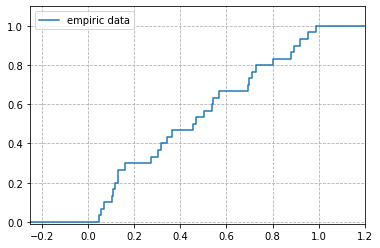

|      F(y) | when               |
|-----------+--------------------|
| 0         | -inf < y <= 0.05   |
| 0.0666667 | 0.05 < y <= 0.056  |
| 0.1       | 0.056 < y <= 0.069 |
| 0.133333  | 0.069 < y <= 0.106 |
| 0.166667  | 0.106 < y <= 0.109 |
| 0.2       | 0.109 < y <= 0.118 |
| 0.233333  | 0.118 < y <= 0.129 |
| 0.266667  | 0.129 < y <= 0.13  |
| 0.3       | 0.13 < y <= 0.163  |
| 0.333333  | 0.163 < y <= 0.272 |
| 0.366667  | 0.272 < y <= 0.306 |
| 0.4       | 0.306 < y <= 0.319 |
| 0.433333  | 0.319 < y <= 0.344 |
| 0.466667  | 0.344 < y <= 0.364 |
| 0.5       | 0.364 < y <= 0.455 |
| 0.533333  | 0.455 < y <= 0.469 |
| 0.566667  | 0.469 < y <= 0.503 |
| 0.6       | 0.503 < y <= 0.54  |
| 0.633333  | 0.54 < y <= 0.542  |
| 0.666667  | 0.542 < y <= 0.569 |
| 0.7       | 0.569 < y <= 0.694 |
| 0.733333  | 0.694 < y <= 0.696 |
| 0.766667  | 0.696 < y <= 0.71  |
| 0.8       | 0.71 < y <= 0.728  |
| 0.833333  | 0.728 < y <= 0.8   |
| 0.866667  | 0.8 < y <= 0.878   |
| 0.9       | 0.878 

In [7]:
y, f = get_empiric_data(30)
print(get_empirical_points_as_table(y, f))


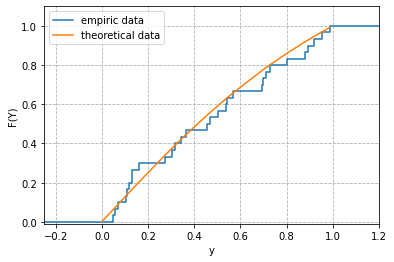

In [8]:
theoretical_plot(y, f)


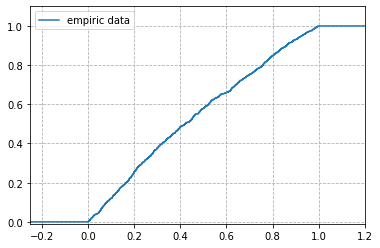

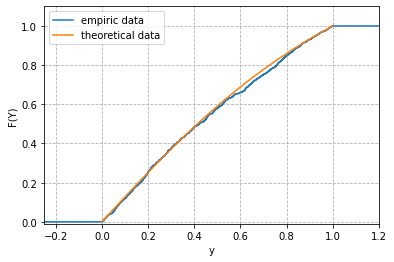

In [9]:
n = 1000
y, f = get_empiric_data(n)
theoretical_plot(y, f)


Глядя на график можно сказать, что для большой выборки эмпирические и теоретические значения почти совпадают
